In [18]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import GridSearchCV
import math
from math import sqrt
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy.stats as stats

In [2]:
# Load the train data and split into labels and features
train_data = pd.read_csv('data_science_challenge/data_science_challenge/train.csv', header=None, names=['col1', 'col2', 'col3', 'col4', 'col5', 'col6'])

# Load the test data
test_data = pd.read_csv('data_science_challenge/data_science_challenge/test.csv', header=None, names=['col1', 'col2', 'col3', 'col4', 'col5'])

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   col1    1000000 non-null  object 
 1   col2    1000000 non-null  object 
 2   col3    1000000 non-null  float64
 3   col4    1000000 non-null  float64
 4   col5    1000000 non-null  float64
 5   col6    1000000 non-null  int64  
dtypes: float64(3), int64(1), object(2)
memory usage: 45.8+ MB


In [23]:
#Description
train_data.describe()

,col3,col4,col5,col6
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,3.498577,3.502040,3.502117,0.296819
std,2.022159,2.019445,2.020394,0.456856
min,0.000000,0.000000,0.000000,0.000000
25%,1.750000,1.760000,1.750000,0.000000
50%,3.500000,3.500000,3.510000,0.000000
75%,5.250000,5.250000,5.250000,1.000000
max,7.000000,7.000000,7.000000,1.000000


C:\Apps\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='col6', ylabel='count'>

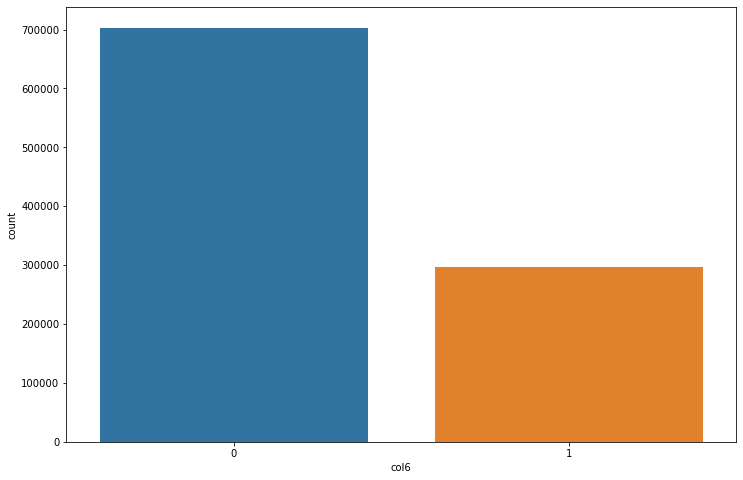

In [4]:
plt.figure(figsize=(12,8))
sns.countplot(train_data['col6'])

In [5]:
# One-hot Encoding (for column 'col2')

#For training dataset
one_hot = pd.get_dummies(train_data['col2'])

new_train_data = pd.concat([train_data, one_hot], axis=1)

new_train_data.drop('col1', axis=1, inplace=True)
new_train_data.drop('col2', axis=1, inplace=True)

In [6]:
# One-hot Encoding (for column 'col2')

#For testing dataset
one_hot = pd.get_dummies(test_data['col2'])

new_test_data = pd.concat([test_data, one_hot], axis=1)

new_test_data.drop('col1', axis=1, inplace=True)
new_test_data.drop('col2', axis=1, inplace=True)

In [7]:
new_test_data

,col3,col4,col5,akron,alameda,albany,alexandria,alhambra,allen,amarillo,...,whittier,wichita,wichita falls,wilmington,worcester,wyoming,yakima,yonkers,yorba linda,yuma
0,2.30,3.77,1.21,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4.37,0.61,4.57,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.44,4.68,4.51,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3.39,0.20,6.06,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2.89,4.22,1.90,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2.60,6.03,5.32,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
996,1.30,0.51,6.81,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,1.71,3.49,2.63,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
998,6.92,4.36,4.61,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
# Normalization
scaler = StandardScaler()
#Training dataset
one_hot_df = pd.DataFrame(scaler.fit_transform(new_train_data.iloc[:, 4:]))

mean_df = pd.DataFrame(one_hot_df.mean(axis=1), columns=['mean_feature'])

new_train_data = pd.concat([new_train_data.iloc[:, 0:4], mean_df], axis=1)

#Testing dataset
one_hot_df = pd.DataFrame(scaler.fit_transform(new_test_data.iloc[:, 3:]))

mean_df = pd.DataFrame(one_hot_df.mean(axis=1), columns=['mean_feature'])

new_test_data = pd.concat([new_test_data.iloc[:, 0:3], mean_df], axis=1)

In [9]:
new_train_data

,col3,col4,col5,col6,mean_feature
0,3.52,0.03,2.32,0,0.000587
1,0.99,3.65,5.06,0,0.000465
2,6.39,6.40,5.77,0,0.001017
3,4.03,3.23,0.06,0,-0.012115
4,0.25,1.38,5.69,1,0.002421
...,...,...,...,...,...
999995,1.73,6.27,4.70,0,0.001531
999996,2.97,4.11,0.02,1,0.002210
999997,5.71,5.07,4.97,0,0.000937
999998,1.14,6.09,0.88,1,0.002598


In [ ]:
new_train_data.describe()

Based on the data, it is known that the column 'mean_feature' has little impact on the prediction, therefore it will not be included as a feature.

In [12]:
#get features and labels fot following models
train_labels = new_train_data.iloc[:, -2]
train_features = new_train_data.loc[:, ['col3', 'col4', 'col5']]

In [15]:
test_features = new_test_data.loc[:, ['col3', 'col4', 'col5']]

In [16]:
# Split train dataset into train set and validate set 
from sklearn.model_selection import train_test_split

X_train, X_validate, y_train, y_validate = train_test_split(train_features, train_labels, test_size=0.3, random_state=101)

# Linear Regression

In [17]:
# Train a linear regression model
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

# Calculate RMSE
y_predictions = model.predict(X_validate)
train_rmse = sqrt(mean_squared_error(y_validate, y_predictions))
print('Train RMSE:', train_rmse)

Train RMSE: 0.4564656954657432


# Decision Tree  and Random Forest

## Decision Tree

In [19]:
from sklearn.tree import DecisionTreeRegressor

# find the best paramater -- Grid Search
param_grid = {
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
}
regressor = DecisionTreeRegressor()

# Define custom scoring function to calculate RMSE
def rmse(y_true, y_pred):
    return math.sqrt(mean_squared_error(y_true, y_pred))

# Create RMSE scorer
rmse_scorer = make_scorer(rmse, greater_is_better=False)

grid_search = GridSearchCV(regressor, param_grid, cv=5, scoring=rmse_scorer)
grid_search.fit(X_train, y_train)

print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(np.sqrt(-grid_search.best_score_)))

Best parameters: {'max_depth': 7, 'min_samples_split': 10}
Best cross-validation score: 0.67


In [20]:
# we try best parameter max_depth=7, min_samples_split=10:
model = DecisionTreeRegressor(max_depth=7, min_samples_split=10)
model.fit(X_train, y_train)

# Calculate RMSE
y_predictions = model.predict(X_validate)
train_rmse = sqrt(mean_squared_error(y_validate, y_predictions))
print('Train RMSE:', train_rmse)

Train RMSE: 0.4531867983098469


## Random Forest

In [22]:
from sklearn.ensemble import RandomForestRegressor

# find the best paramater -- Grid Search
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rfc = RandomForestRegressor()

# Define custom scoring function to calculate RMSE
def rmse(y_true, y_pred):
    return math.sqrt(mean_squared_error(y_true, y_pred))

# Create RMSE scorer
rmse_scorer = make_scorer(rmse, greater_is_better=False)

grid_search = GridSearchCV(rfc, param_grid=param_grid, cv=5, scoring=rmse_scorer)
grid_search.fit(X_train, y_train)

print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(np.sqrt(-grid_search.best_score_)))

KeyboardInterrupt: 

In [ ]:
# we try best parameter:
model = RandomForestRegressor(n_estimators=grid_search.best_params_['n_estimators'],
                              max_depth=grid_search.best_params_['max_depth'], 
                              min_samples_split=grid_search.best_params_['min_samples_split'],
                              min_samples_leaf=grid_search.best_params_['min_samples_leaf'])
model.fit(X_train, y_train)

# Calculate RMSE
y_predictions = model.predict(X_validate)
train_rmse = sqrt(mean_squared_error(y_validate, y_predictions))
print('Train RMSE:', train_rmse)

# Support Vector Machines

In [ ]:
from sklearn.svm import SVR

param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001]} 

model = SVR()

# Define custom scoring function to calculate RMSE
def rmse(y_true, y_pred):
    return math.sqrt(mean_squared_error(y_true, y_pred))

# Create RMSE scorer
rmse_scorer = make_scorer(rmse, greater_is_better=False)

grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, scoring=rmse_scorer)
grid_search.fit(X_train, y_train)

print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(np.sqrt(-grid_search.best_score_)))

In [ ]:
# we try best parameter:
model = SVR(C=grid_search.best_params_['C'],
            gamma=grid_search.best_params_['gamma'])
model.fit(X_train, y_train)

# Calculate RMSE
y_predictions = model.predict(X_validate)
train_rmse = sqrt(mean_squared_error(y_validate, y_predictions))
print('Train RMSE:', train_rmse)

## XGBoost Regression

In [28]:
import xgboost as xg

# Define custom scoring function to calculate RMSE
def rmse(y_true, y_pred):
    return math.sqrt(mean_squared_error(y_true, y_pred))

#=========================================================================
# XGBoost regression: 
# Parameters: 
# n_estimators  "Number of gradient boosted trees. Equivalent to number 
#                of boosting rounds."
# learning_rate "Boosting learning rate (also known as “eta”)"
# max_depth     "Maximum depth of a tree. Increasing this value will make 
#                the model more complex and more likely to overfit." 
#=========================================================================
regressor=xg.XGBRegressor(eval_metric=rmse)

In [30]:
# set up our search grid
param_grid = {"max_depth":    [4, 5],
              "n_estimators": [500, 600, 700],
              "learning_rate": [0.01, 0.015]}

# Create RMSE scorer
rmse_scorer = make_scorer(rmse, greater_is_better=False)

grid_search = GridSearchCV(regressor, param_grid=param_grid, cv=5, scoring=rmse_scorer)
grid_search.fit(X_train, y_train)

print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(np.sqrt(-grid_search.best_score_)))

Best parameters: {'learning_rate': 0.015, 'max_depth': 5, 'n_estimators': 700}
Best cross-validation score: 0.67


In [33]:
regressor=xg.XGBRegressor(learning_rate = grid_search.best_params_["learning_rate"],
                           n_estimators  = grid_search.best_params_["n_estimators"],
                           max_depth     = grid_search.best_params_["max_depth"],
                           eval_metric=rmse)

regressor.fit(X_train, y_train)

# Calculate RMSE
y_predictions = regressor.predict(X_validate)
train_rmse = sqrt(mean_squared_error(y_validate, y_predictions))
print('Train RMSE:', train_rmse)

Train RMSE: 0.45170378234780295


# TEST

## After comparing with the previous models, I have decided to use the XGBoost model to make predictions on the test dataset.

In [34]:
pred_list = list(regressor.predict(test_features))

In [39]:
with open('labels.txt', 'w') as f:
    f.writelines(map(lambda x: str(x) + '\n', pred_list))